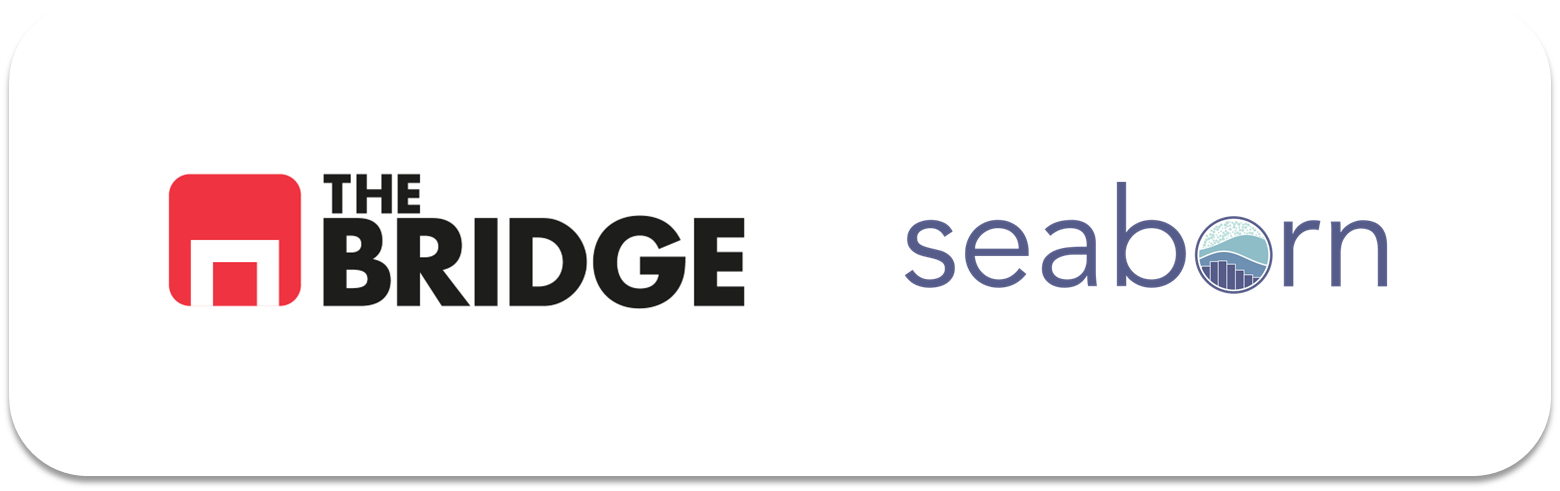

## PRACTICA OBLIGATORIA: **Visualización Avanzada y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True

## #1: Visualización

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [5]:
df=pd.read_csv("./data/california_cities.csv", index_col=0)

In [7]:
df.head(10)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                482 non-null    object 
 1   latd                482 non-null    float64
 2   longd               482 non-null    float64
 3   elevation_m         434 non-null    float64
 4   elevation_ft        470 non-null    float64
 5   population_total    482 non-null    int64  
 6   area_total_sq_mi    480 non-null    float64
 7   area_land_sq_mi     482 non-null    float64
 8   area_water_sq_mi    481 non-null    float64
 9   area_total_km2      477 non-null    float64
 10  area_land_km2       478 non-null    float64
 11  area_water_km2      478 non-null    float64
 12  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 52.7+ KB


,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
count,482.000000,482.000000,434.000000,470.000000,4.820000e+02,480.000000,482.000000,481.000000,477.000000,478.000000,478.000000,477.000000
mean,36.095088,-119.837714,180.416705,567.168723,6.489493e+04,18.442183,16.840981,1.589630,46.753283,43.547021,3.125178,5.301801
std,2.298006,2.147676,309.531825,1001.265722,2.032041e+05,36.363230,32.694647,9.490386,90.972269,84.933022,11.562269,14.656428
min,32.578333,-124.263333,-34.000000,-180.000000,1.000000e+00,0.314000,0.314000,0.000000,0.813000,0.813000,0.000000,0.000000
25%,33.977292,-121.954931,22.000000,69.000000,1.090200e+04,3.708250,3.506500,0.000000,9.551000,9.025000,0.000250,0.000000
50%,36.204722,-119.708611,67.000000,200.000000,2.905750e+04,9.093000,8.362000,0.029000,23.551000,21.533000,0.078500,0.340000
75%,37.886667,-117.977292,173.500000,515.000000,6.646650e+04,19.878250,19.090000,0.244000,51.772000,49.322000,0.623250,1.870000
max,41.965000,-114.596389,2402.000000,7880.000000,3.884307e+06,503.000000,469.000000,185.020000,1302.000000,1214.000000,122.270000,84.580000


In [6]:
df.isna().sum().sort_values(ascending=False)

elevation_m           48
elevation_ft          12
area_water_percent     5
area_total_km2         5
area_water_km2         4
area_land_km2          4
area_total_sq_mi       2
area_water_sq_mi       1
city                   0
latd                   0
longd                  0
area_land_sq_mi        0
population_total       0
dtype: int64

In [8]:
#Creamos una nueva columna conviertiendo los pies en metros 
df["elevation_m_from_ft"]=df.elevation_ft*0.3048

In [9]:
df.iloc[abs(df["elevation_m"]-df["elevation_m_from_ft"]).nlargest(20).index]

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,elevation_m_from_ft
115,DosPalos,36.983333,-120.633333,362.0,118.0,4950,1.350,1.350,0.000,3.496,3.496,0.000,0.00,35.9664
362,SanBernardino,34.100000,-117.300000,321.0,1974.0,209924,59.645,59.201,0.444,154.480,153.330,1.150,0.74,601.6752
53,Calabasas,34.138333,-118.660833,243.0,5.0,23058,13.300,13.249,0.051,34.400,34.270,0.131,0.38,1.5240
239,LosAngeles,34.050000,-118.250000,71.0,2.0,3884307,503.000,469.000,34.000,1302.000,1214.000,88.000,6.70,0.6096
337,RanchoSantaMargarita,33.641389,-117.594444,290.0,775.0,47853,12.992,12.957,0.035,33.651,33.560,0.091,0.27,236.2200
72,ChinoHills,33.975278,-117.723056,365.0,1070.0,75655,44.749,44.681,0.068,115.899,115.723,0.175,0.15,326.1360
210,LakeForest,33.641667,-117.690833,148.0,400.0,77264,17.902,17.816,0.086,46.366,46.143,0.223,0.48,121.9200
318,Pinole,38.004444,-122.291111,31.0,23.0,18390,13.575,5.323,8.252,35.160,13.787,21.372,60.79,7.0104
262,MissionViejo,33.612778,-117.656111,121.0,448.0,96346,18.123,17.739,0.384,46.939,45.944,0.995,2.12,136.5504
305,PalmSprings,33.823889,-116.530278,146.0,440.0,44552,94.975,94.116,0.859,245.984,243.761,2.224,0.90,134.1120


In [10]:
df.loc[df["elevation_m"].isna(), "elevation_m"] = df.loc[df["elevation_m"].isna(), "elevation_m_from_ft"]

In [11]:
df=df.dropna()

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [12]:
df.columns

Index(['city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent', 'elevation_m_from_ft'],
      dtype='object')

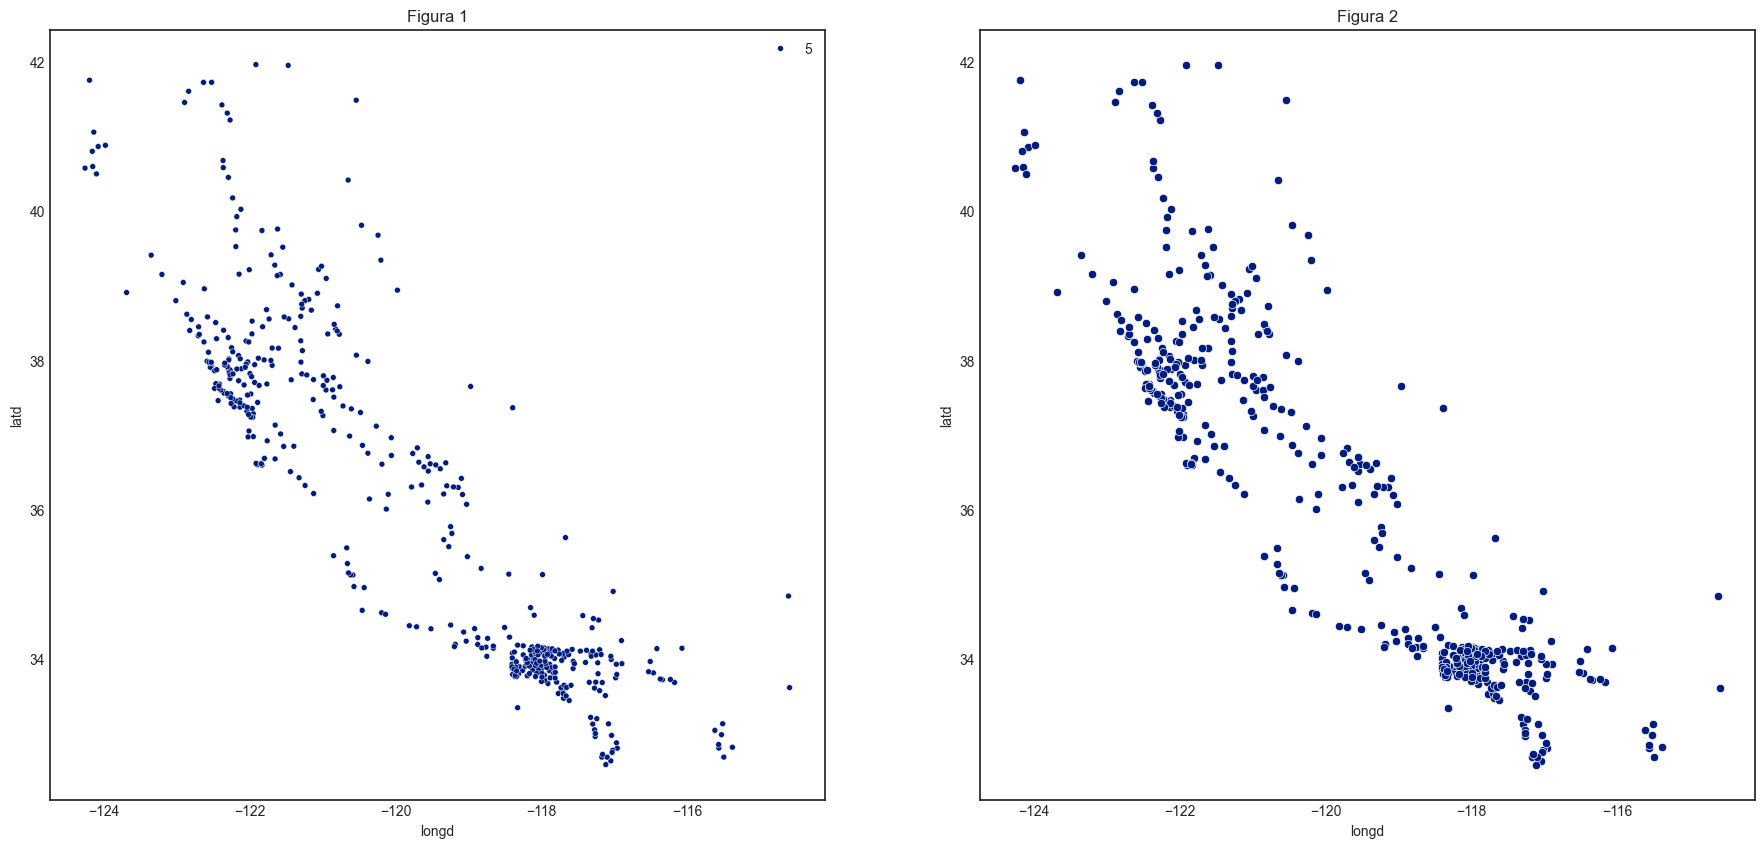

In [51]:
#OPCIÓN 1: subplot
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x="longd", y="latd", size=5)
plt.title("Figura 1")
plt.style.use("seaborn-v0_8-dark-palette")

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="longd", y="latd", sizes=(50,50))
plt.title("Figura 2")
plt.style.use("seaborn-v0_8-dark-palette")


<Axes: xlabel='longd', ylabel='latd'>

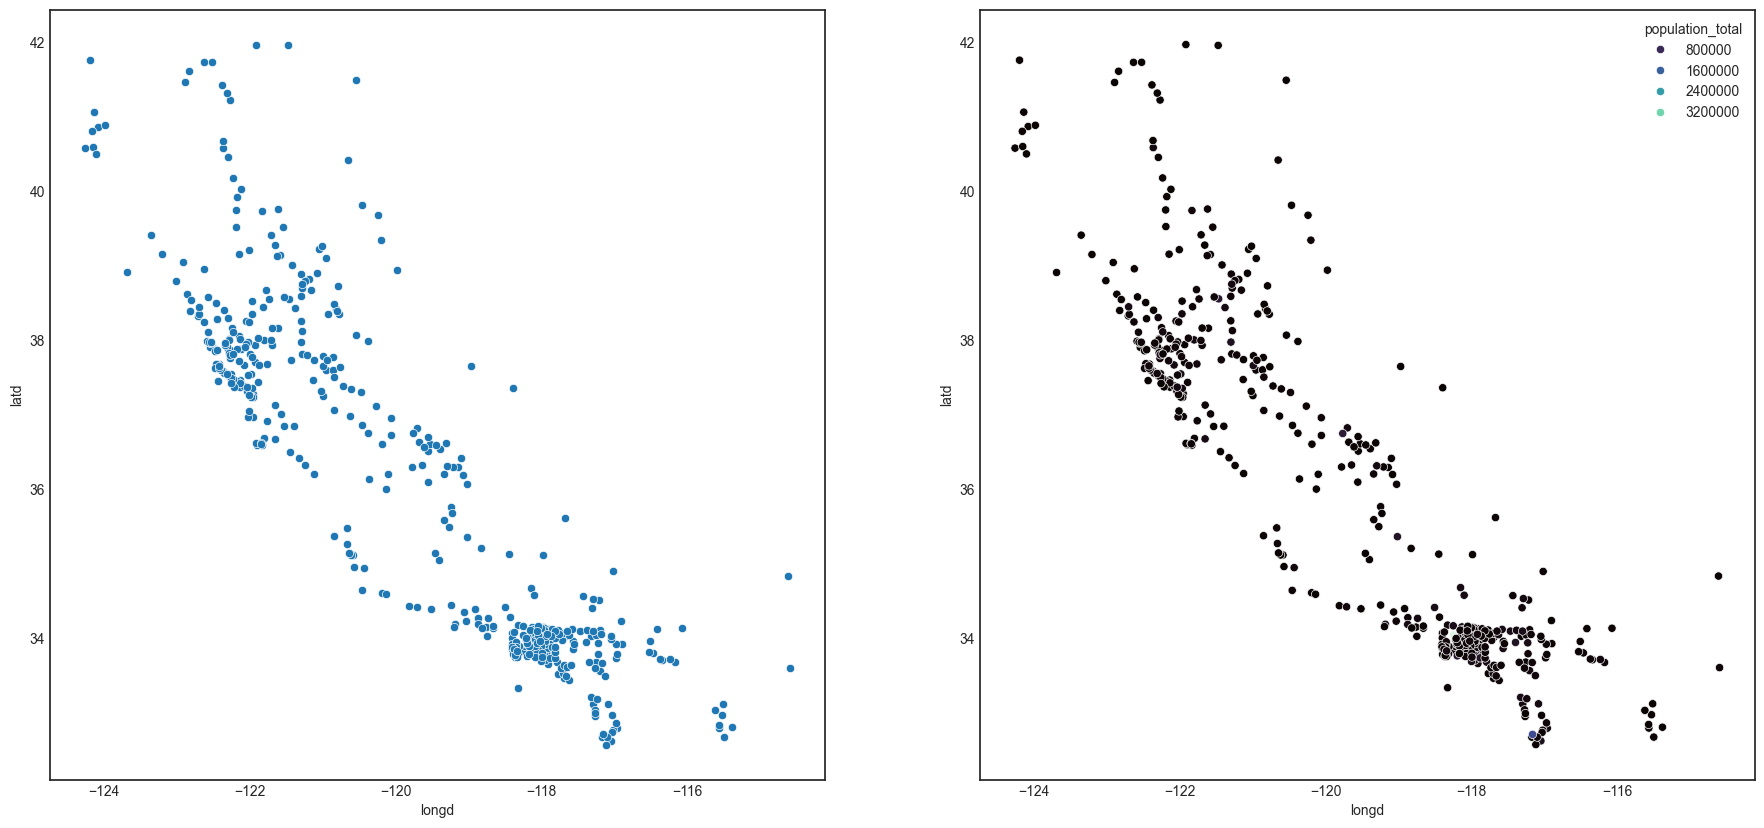

In [22]:
#OPCIÓN 2: subplots
fig, ax =plt.subplots(1, 2, figsize=(22,10))

figura1=ax[0]
sns.scatterplot(data=df, x="longd", y="latd", ax=figura1)


figura2=ax[1]
sns.scatterplot(data=df, x="longd", y="latd", palette="mako", hue="population_total", ax=figura2)


In [27]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [72]:
#Creamos la función (mi opción es muy sencilla):
def pinta_dispersion(df, num1, num2, colors, size):
    plt.figure(figsize=(22,10))
    plt.title("Gráfico de dispersión", fontsize=18)
    plt.xlabel("longd")
    plt.ylabel("latd")
    fig= sns.scatterplot(data= df, x=num1, y=num2, hue=colors, size=colors, palette="viridis", sizes=sizes)
    return fig


In [70]:
#Aurgumentos de entrada:
num1="longd"
num2="latd"
colors="population_total"
size=df.area_total_km2
sizes=10,1000

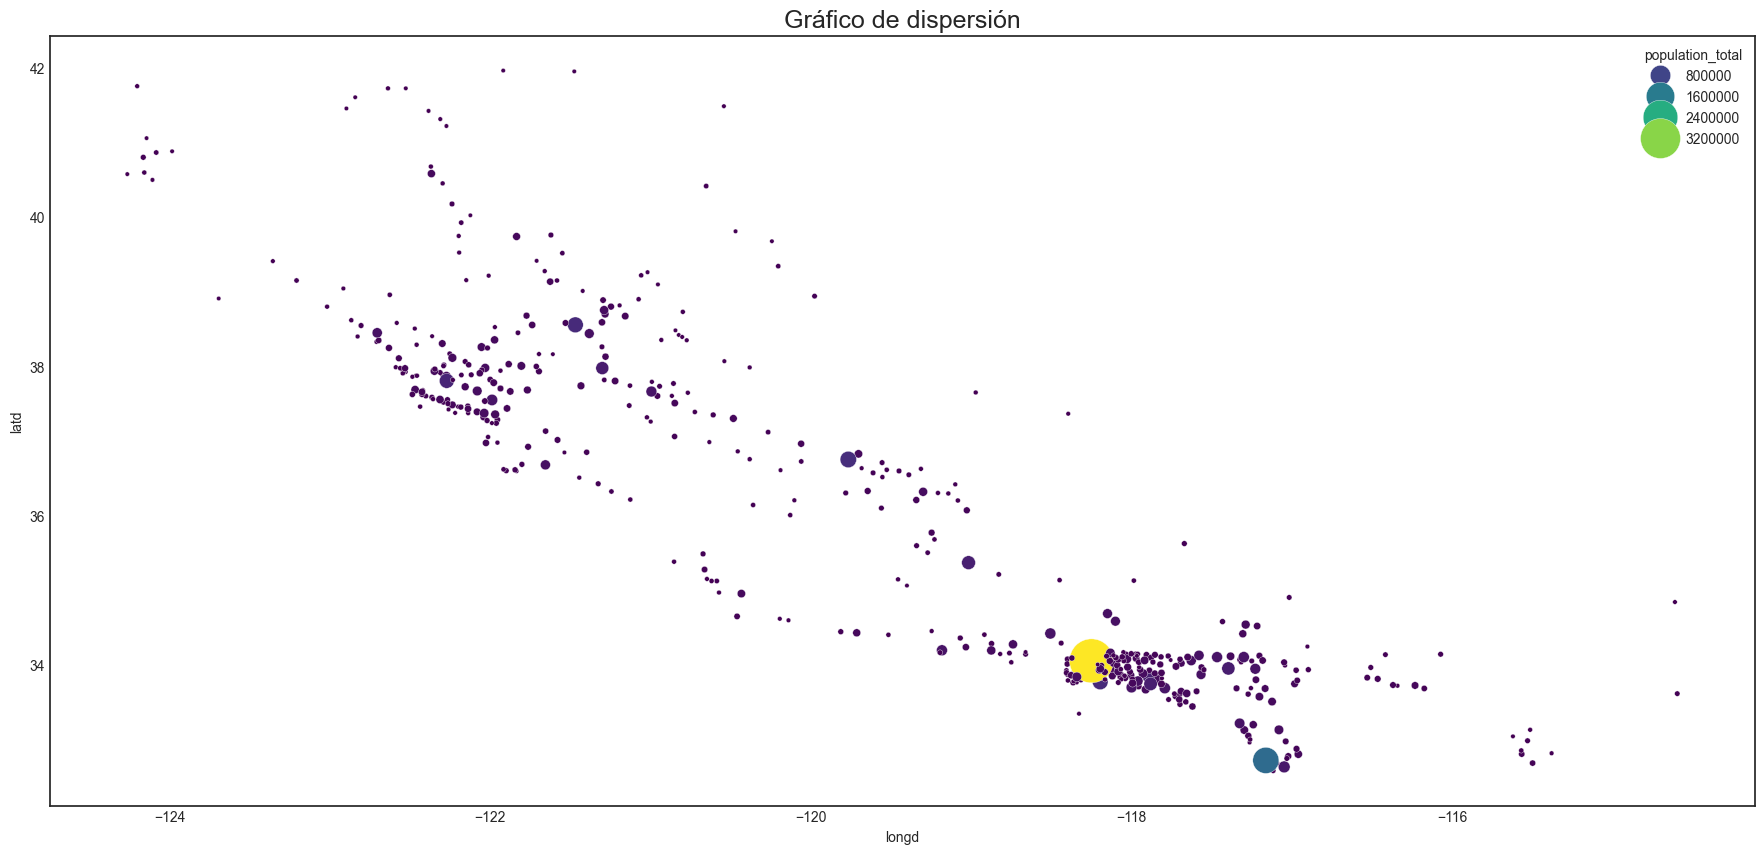

In [73]:
pinta_dispersion(df, num1, num2, colors, size);

In [54]:
#Funcion propuesta en clase:
def scatter_plot_with_controls(df, x_col, y_col, color_col= None, size_col = "", scale= 1, legend= True):

    fig, ax = plt.subplots(figsize = (20,10)) # Cuando creas 1 sólo gráfico no hace falta poner 1,1
    # Creamos el scatter en función de los argumentos de entrada
    sizes = (10,1000)

    if type(size_col) == str:
        if size_col != "": # Si el argumento size es un str consideramos que es una de las columnas del dataframe
            if color_col: # Ahora comprobamos que realmente haya columna de color
                scatter = sns.scatterplot(data = df,
                                          x = x_col,
                                          y = y_col, 
                                          hue = color_col,
                                          size = df[size_col] * scale,
                                          palette = "mako",
                                          alpha = 0.5, 
                                          ax = ax, 
                                          sizes = sizes,
                                          )
                
            else: # No hay columna de color, así que no lo pasamos como argumento y dejamos que lo escoja el método
                scatter = sns.scatterplot(x = x_col, 
                                          y = y_col, 
                                          size = df[size_col] * scale, 
                                          data = df, 
                                          alpha = 0.5, 
                                          ax = ax, 
                                          sizes = sizes,)
        elif color_col: # Si hay categoria de color y además datos de tamaño que no son una columna
            scatter = sns.scatterplot(x = x_col, 
                                      y = y_col, 
                                      data = df, 
                                      hue = color_col, 
                                      alpha=0.5, 
                                      palette='viridis', 
                                      ax = ax, 
                                      sizes = sizes) # Ojo no aplicamos la escala
    else:
        scatter = sns.scatterplot(x = x_col, 
                                  y = y_col, 
                                  size = size_col, 
                                  data = df, 
                                  alpha= 0.5, 
                                  palette='viridis', 
                                  ax = ax, 
                                  sizes = sizes,) # Ojo no aplicamos la escala, ni el color
    # Labels

    if legend:
        ax.legend(ncol = 2, loc="upper right", frameon = False, labelspacing = 2)
        
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    return ax


In [ ]:
#categorización:
df["cat_population"] = "<1000 hab."
df.loc[df.log_population > 3, "cat_population"] = "1K-10K hab."
df.loc[df.log_population > 4, "cat_population"] = "10K- 100K hab."
df.loc[df.log_population > 5, "cat_population"] = "100K - 1M hab."
df.loc[df.log_population > 6, "cat_population"] = "1M+ hab."

AttributeError: 'DataFrame' object has no attribute 'log_population'

C:\Users\aquin\AppData\Local\Temp\ipykernel_13420\324154721.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(x = x_col,


<Axes: xlabel='longd', ylabel='latd'>

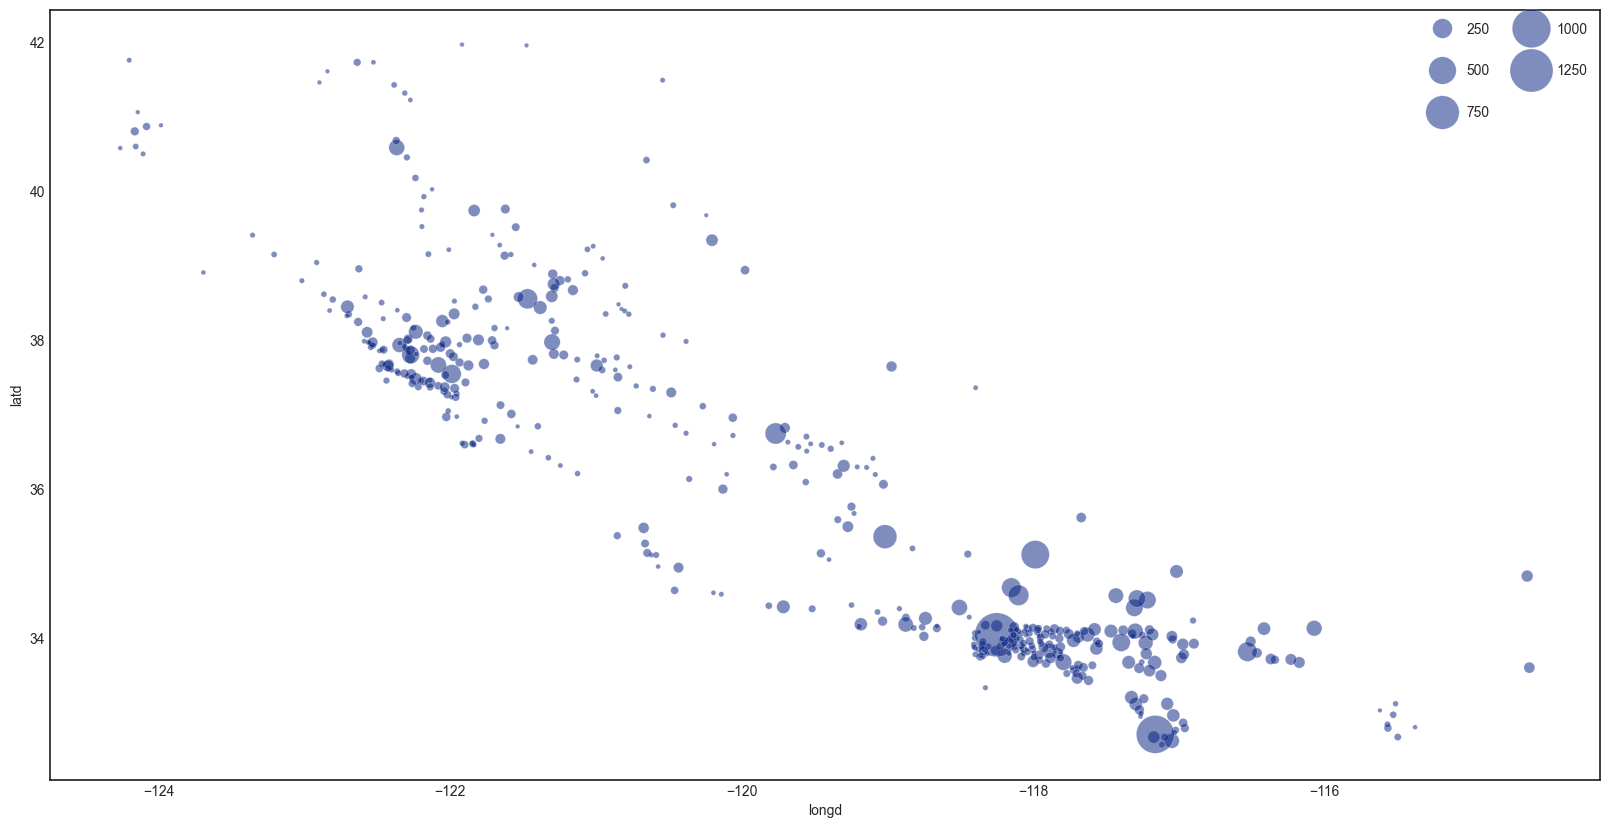

In [67]:
scatter_plot_with_controls(df, num1, num2, colors, size, scale= 1, legend= True)

<Axes: xlabel='population_total', ylabel='Count'>

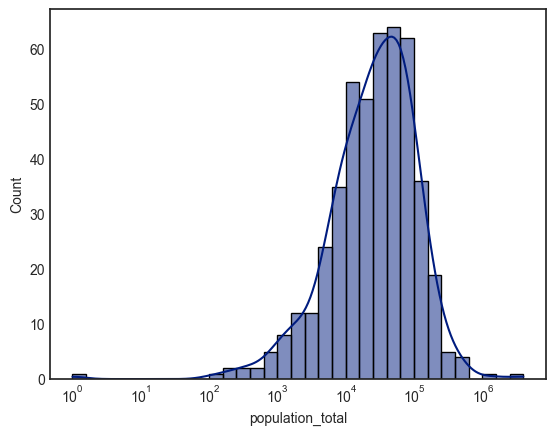

In [57]:
sns.histplot(df["population_total"], kde=True, log_scale=10) #distribución lo normal

In [ ]:
df.loc[df.city]

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

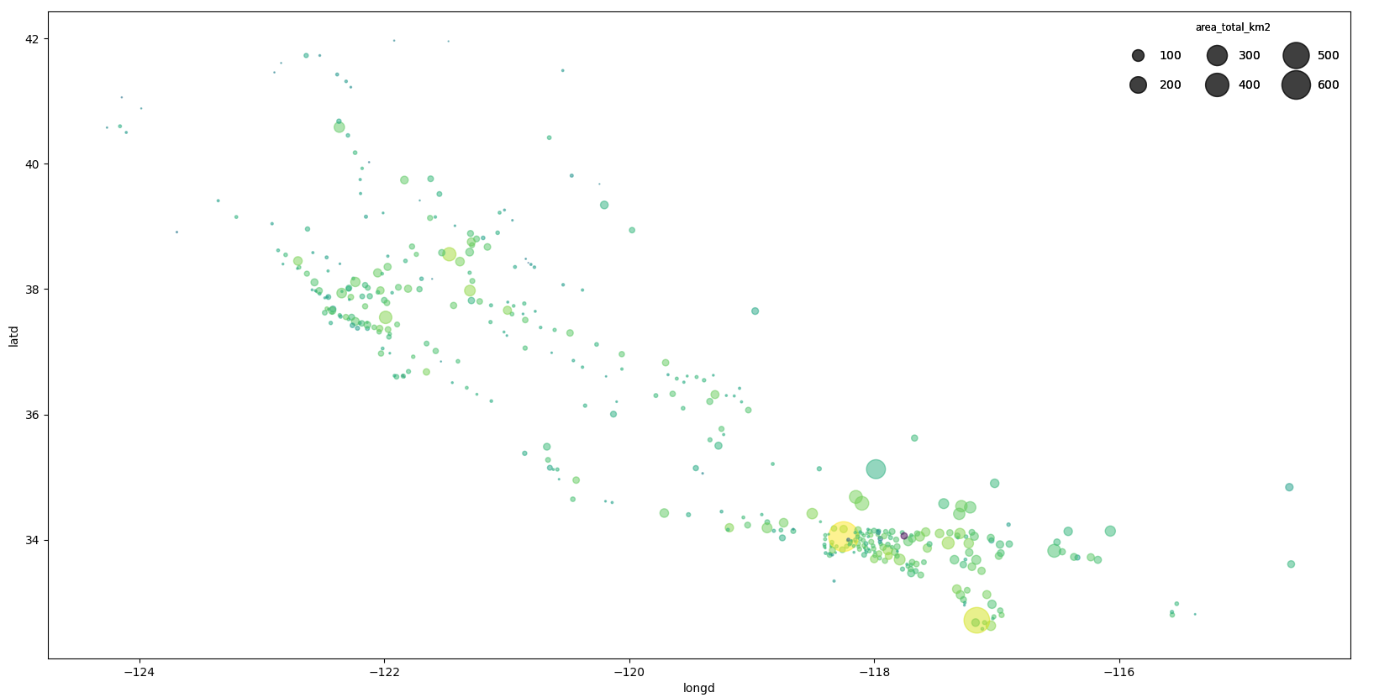

## #2: Presentación

En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

In [75]:
df_titanic = pd.read_csv("./data/titanic.csv")
df2=df_titanic.copy()

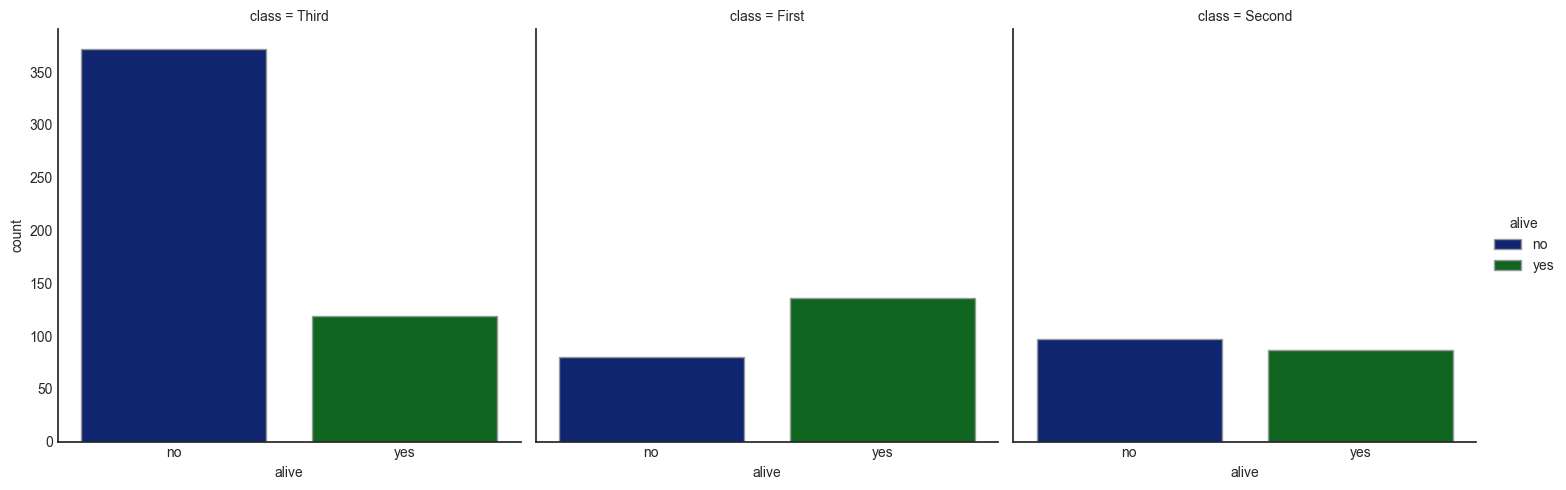

In [76]:
#GRÁFICA 1 (figura de barras):
fig1= sns.catplot(x="alive", col = "class", kind="count", edgecolor=".6",orient = "V", hue = "alive", legend= True, data=df2)


In [77]:
cat_colx="alive"
cat_coly="class"
frecuencias_absolutas=df2.groupby(cat_coly, as_index=False)[cat_colx].value_counts()
frecuencias_relativas=df2.groupby(cat_coly, as_index=False)[cat_colx].value_counts(normalize=True)
print(frecuencias_absolutas)
print(frecuencias_relativas)
frecuencias_relativas["proportion"] *= 100

    class alive  count
0   First   yes    136
1   First    no     80
2  Second    no     97
3  Second   yes     87
4   Third    no    372
5   Third   yes    119
    class alive  proportion
0   First   yes    0.629630
1   First    no    0.370370
2  Second    no    0.527174
3  Second   yes    0.472826
4   Third    no    0.757637
5   Third   yes    0.242363


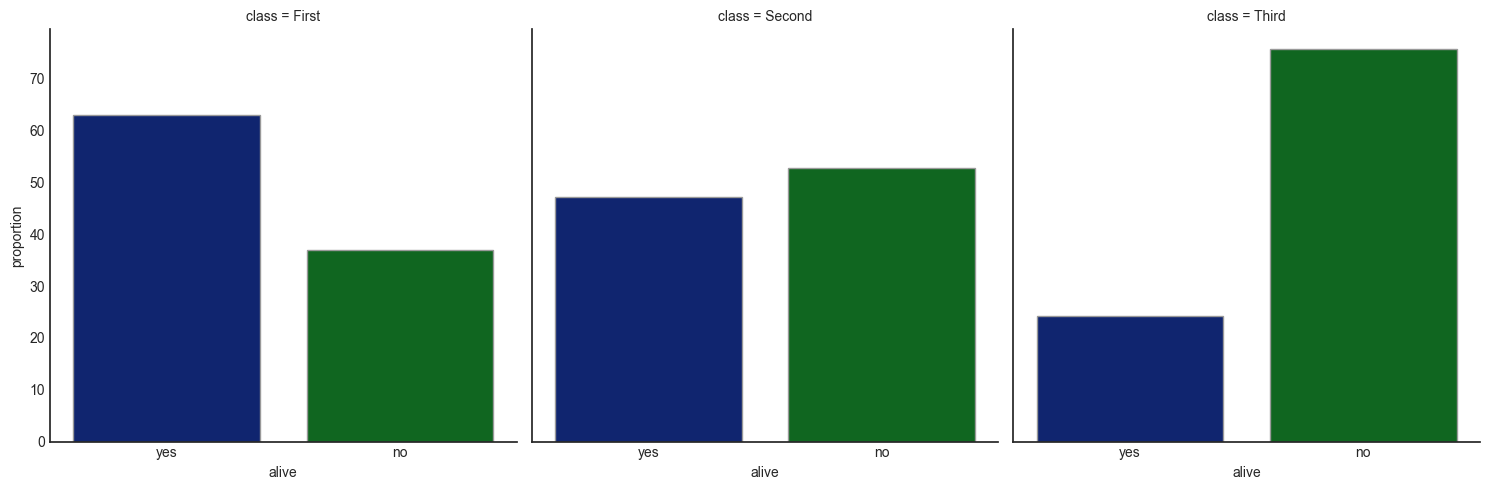

In [78]:
sns.catplot(x="alive",
            y = "proportion", #valor de la columna
            col="class",
            hue = "alive",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            data=frecuencias_relativas);

In [80]:
#GRÁFICA 2 (otro gráfico de barras):
cat_colx="who"
cat_coly="alive"
frecuencias_absolutas2=df2.groupby(cat_coly, as_index=False)[cat_colx].value_counts()
frecuencias_relativas2=df2.groupby(cat_coly, as_index=False)[cat_colx].value_counts(normalize=True)
print(frecuencias_absolutas2)
print(frecuencias_relativas2)
frecuencias_relativas2["proportion"] *= 100

  alive    who  count
0    no    man    449
1    no  woman     66
2    no  child     34
3   yes  woman    205
4   yes    man     88
5   yes  child     49
  alive    who  proportion
0    no    man    0.817851
1    no  woman    0.120219
2    no  child    0.061931
3   yes  woman    0.599415
4   yes    man    0.257310
5   yes  child    0.143275


In [87]:
df3=frecuencias_relativas2.loc[frecuencias_relativas2["alive"]=="Yes",:]

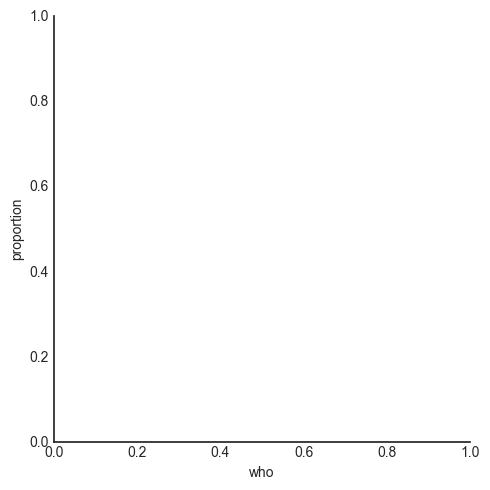

In [89]:
sns.catplot(x="who",
            y = "proportion", 
            hue = "who",
            kind="bar", 
            edgecolor=".6",
            data=df3);



#2.2 Las gráficas a emplear en la presentación debes generarlas en un notebook.  

Tienes que entregar ambas cosas: presentación y notebook :)